# Udacity Data Analyst Nanodegree Program
# Communicate Data Findings Project: An Exploration of Ford GoBike's 2017 Data

## By: Jessica Macrillo 
### August 2019



- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
    - [Quality](#quality)
- [Clean](#clean)
- [Store Dataframe](#store) 
- [Analyze](#analyze)
    - [Univariate Exploration](#univariate)
    - [Bivariate Exploration](#bivariate)
    - [Multivariate Exploration](#multivariate)
- [References](#references)



<a id = 'intro'></a>
## Introduction
The purpose of this project is to conduct an exploratory and explanatory data analysis of Ford's GoBike Data for the year 2017. The data was sourced from Lyft and contains information on individual trips in a bike-sharing system covering the greater San Francisco Bay area. The purpose of this analysis was to see if particular factors influenced bike-share usage. More specifically, determining if age, gender, subscriber status, times of travel, popular stations  and trip duration influence utilization of the bike-share system.

<a id = 'gather'></a>
## Gather

In this section, data will be gathered and loaded into the Jupyter notebook. The 'csv' file was downloaded from Lyft's website, uploaded into the Jupyter notebook and pandas was used to read in the 'csv' file. Furthermore, all packages will be imported that are necessary to complete the exploratory and explanatory data analysis.

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load downloaded dataset using pandas and look at first 5 rows of data.
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


<a id = 'assess'></a>
## Assess

In the Assess section, data will be examined programmatically using various pandas methods, including, .shape, .describe, .info, .isnull, .duplicated, .value_counts, .sample and .hist. After assessments have been made programmatically, data will be evaluated for quality and tidiness.

In [3]:
#Inspect shape of the dataset.
df.shape

(519700, 15)

In [4]:
#Descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [5]:
#Run info command to look for missing values and discover data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [6]:
#Check dataframe for null values
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [7]:
#Check dataframe for duplicated data
sum(df.duplicated())

0

In [8]:
#Value counts for user_type
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [9]:
#Value counts for gender
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [10]:
#Value counts for birth_year
df.member_birth_year.value_counts()

1985.0    24342
1988.0    23610
1987.0    22493
1984.0    21061
1982.0    21005
1986.0    20134
1983.0    19270
1989.0    19202
1990.0    16832
1991.0    16009
1981.0    15132
1980.0    14817
1993.0    13394
1979.0    12691
1992.0    11928
1977.0    11798
1975.0    11454
1978.0    10845
1994.0     9932
1973.0     9230
1974.0     9186
1968.0     9038
1976.0     8782
1965.0     7926
1971.0     7892
1970.0     7599
1967.0     6650
1972.0     6645
1995.0     6616
1969.0     6556
          ...  
1957.0     1525
1955.0     1082
1952.0      960
1999.0      899
1951.0      745
1950.0      740
1953.0      596
1947.0      534
1949.0      500
1948.0      464
1945.0      280
1944.0      231
1902.0      217
1943.0      188
1900.0      142
1935.0      134
1946.0       82
1942.0       73
1924.0       66
1941.0       57
1933.0       41
1939.0       37
1934.0       34
1928.0       29
1940.0       29
1938.0       22
1911.0       12
1907.0        7
1901.0        4
1886.0        2
Name: member_birth_year,

In [11]:
#Sample of 10 rows of data
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
1044,2054,2017-12-31 11:54:04.5350,2017-12-31 12:28:19.3620,98,Valencia St at 16th St,37.765052,-122.421866,324,Union Square (Powell St at Post St),37.788300,-122.408531,1672,Customer,1992.0,Male
134220,1666,2017-11-14 15:44:44.0840,2017-11-14 16:12:30.3340,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2267,Subscriber,NaN,NaN
259109,865,2017-10-10 08:10:53.8590,2017-10-10 08:25:19.1280,86,Market St at Dolores St,37.769305,-122.426826,37,2nd St at Folsom St,37.785000,-122.395936,3056,Subscriber,1994.0,Male
471202,511,2017-08-01 17:56:31.1680,2017-08-01 18:05:03.1520,182,19th Street BART Station,37.809013,-122.268247,178,Broadway at 30th St,37.819381,-122.261928,1415,Subscriber,1980.0,Female
307220,759,2017-09-26 16:13:13.7230,2017-09-26 16:25:52.9390,81,Berry St at 4th St,37.775880,-122.393170,9,Broadway at Battery St,37.798572,-122.400869,2126,Subscriber,1963.0,Male
446443,922,2017-08-11 18:51:31.0170,2017-08-11 19:06:53.5190,7,Frank H Ogawa Plaza,37.804562,-122.271738,194,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,1433,Customer,1967.0,Male
89,1309,2017-12-31 22:05:27.3890,2017-12-31 22:27:16.5160,28,The Embarcadero at Bryant St,37.787168,-122.388098,6,The Embarcadero at Sansome St,37.804770,-122.403234,2629,Customer,NaN,NaN
99245,1464,2017-11-28 05:42:15.0320,2017-11-28 06:06:39.5440,145,29th St at Church St,37.743684,-122.426806,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1424,Subscriber,1970.0,Male
497871,791,2017-07-18 13:27:03.8960,2017-07-18 13:40:15.7860,14,Clay St at Battery St,37.795001,-122.399970,66,3rd St at Townsend St,37.778742,-122.392741,736,Subscriber,1978.0,Male
72163,613,2017-12-05 13:54:27.5390,2017-12-05 14:04:40.6790,13,Commercial St at Montgomery St,37.794231,-122.402923,62,Victoria Manalo Draves Park,37.777791,-122.406432,3144,Subscriber,1993.0,Male


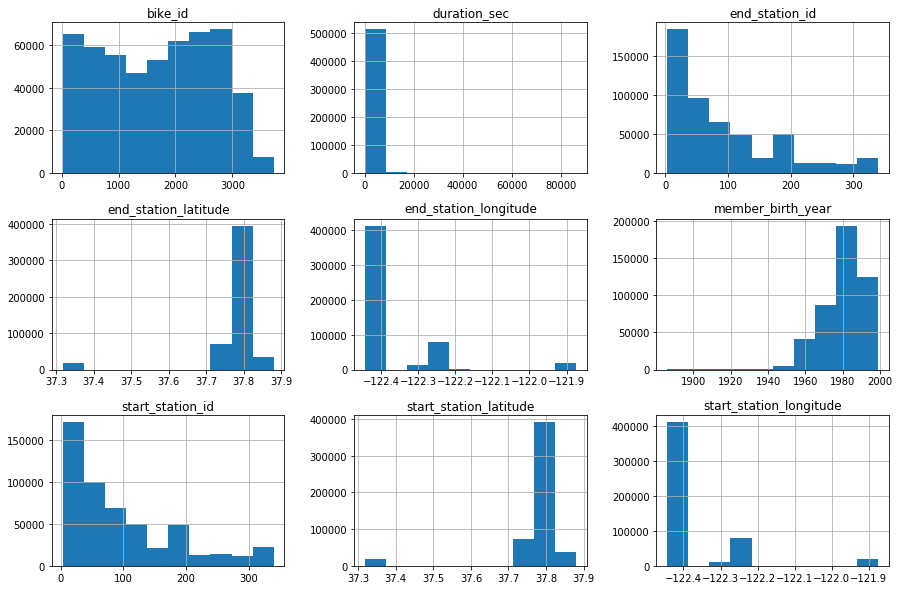

In [12]:
#Create histograms to further explore data
df.hist(figsize=(15,10));

  <a id='quality'></a>
   ### Quality
   The current dataset is tidy, but the below quality issues were identified. As a result, the data set will be cleaned prior to performing any analysis.
   - The variables start_time & end_time are not in the timestamp format
   - The following columns should be converted to object: start_station_id, end_station_id, bike_id
   - Change the variables user_type & member_gender to category 
   - The variable member_birth_year should be used to create new variable member_age
   - There are incorrect values in member_age,  member_age should be converted into an integer and remove birth_year from the dataset.
   - Calculate trip duration in seconds from duration_sec & remove duration_sec from the dataset
   - Extract month, day of week and hour from start_time and hour from end_time
   - Calculate distance from latitude and longitude of start and end stations.
   - Identify and remove outliers in dist_miles.
   - Remove variables from dataset which will not be used for analysis:
       - start_time, end_time, start_station_name, start_station_latitude, start_station_longitude, end_station_name, end_station_longitude, end_station_latitude, dist_km

<a id = 'clean'></a>
### Clean
In the Clean section, data issues discovered in the Quality sub-section of Assess, will be defined, coded and tested.

#### Create copy of dataframe for cleaning.

In [13]:
df_clean = df.copy()

#### Define: 
- The variables start_time & end_time are not in the timestamp format.

#### Code:

In [14]:
#Convert start_time & end_time to datetime.
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#### Test:

In [15]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

#### Define:

- Convert the following columns to object formatting: start_station_id, end_station_id, bike_id

#### Code:

In [16]:
#Convert start_station_id, end_station_id & bike_id to object
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

#### Test:

In [17]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

#### Define
- Convert user_type & member_gender to datatype category

#### Code:

In [18]:
#Use .astype to convert user_type & member_gender to dtype category.
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

#### Test:

In [19]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
dtype: object

#### Define:
- Create new variable member_age by utilizing member_birth_year.

#### Code:

In [20]:
# Subtract member_birth_year from 2017 to calculate bikeshare users age
df_clean['member_age'] = 2017 - df_clean['member_birth_year']

#### Test:

In [21]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,30.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,52.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,20.0


#### Define:
- Explore & remove outliers in member_age.
- Convert member_age into an integer.
- Drop member_birth_year from dataset.

#### Code:

In [22]:
#Explore descriptive statistics for member_age
df_clean.member_age.describe()

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
25%          29.000000
50%          34.000000
75%          43.000000
max         131.000000
Name: member_age, dtype: float64

In [23]:
#Calculate percentiles
df_clean.member_age.describe(percentiles = [.99])

count    453159.000000
mean         36.595213
std          10.513488
min          18.000000
50%          34.000000
99%          66.000000
max         131.000000
Name: member_age, dtype: float64

In [24]:
#Remove bikeshare riders that were older than 66.
df_clean = df_clean.query('member_age <= 66')

In [25]:
#Convert member_age to an integer
df_clean.member_age = df_clean.member_age.astype(int)

In [26]:
#Remove member_birth_year from df_clean.
df_clean.drop(['member_birth_year'], axis=1, inplace=True)

#### Test:

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449234 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               449234 non-null int64
start_time                 449234 non-null datetime64[ns]
end_time                   449234 non-null datetime64[ns]
start_station_id           449234 non-null object
start_station_name         449234 non-null object
start_station_latitude     449234 non-null float64
start_station_longitude    449234 non-null float64
end_station_id             449234 non-null object
end_station_name           449234 non-null object
end_station_latitude       449234 non-null float64
end_station_longitude      449234 non-null float64
bike_id                    449234 non-null object
user_type                  449234 non-null category
member_gender              449234 non-null category
member_age                 449234 non-null int64
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 48.8+ MB


In [28]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,member_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Male,30
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Female,52
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Female,20
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,Female,26
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,Male,27


#### Define:
- Convert duration_sec into duration_min
- Remove duration_min from dataframe

#### Code:

In [29]:
#Convert duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [30]:
#Descriptive statistics for duration_min to explore range of usage
df_clean.duration_min.describe()

count    449234.000000
mean         13.389893
std          42.082262
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max        1437.000000
Name: duration_min, dtype: float64

In [31]:
#Calculate percentiles
df_clean.duration_min.describe(percentiles = [.99])

count    449234.000000
mean         13.389893
std          42.082262
min           1.000000
50%           9.000000
99%          74.000000
max        1437.000000
Name: duration_min, dtype: float64

In [32]:
#Remove bikeshare data for trips longer than 74 minutes.
df_clean = df_clean.query('duration_min <= 74')

In [33]:
#Remove duration_sec from df_clean.
df_clean.drop(['duration_sec'], axis=1, inplace=True)

#### Test:

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444745 entries, 12 to 519699
Data columns (total 15 columns):
start_time                 444745 non-null datetime64[ns]
end_time                   444745 non-null datetime64[ns]
start_station_id           444745 non-null object
start_station_name         444745 non-null object
start_station_latitude     444745 non-null float64
start_station_longitude    444745 non-null float64
end_station_id             444745 non-null object
end_station_name           444745 non-null object
end_station_latitude       444745 non-null float64
end_station_longitude      444745 non-null float64
bike_id                    444745 non-null object
user_type                  444745 non-null category
member_gender              444745 non-null category
member_age                 444745 non-null int64
duration_min               444745 non-null int64
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 48.4+ MB


#### Define:
- Extract month, day of week and hour from start_time and hour from end_time

#### Code:

In [35]:
#Extract month from start_time & create new column start_month
df_clean['start_month'] = df_clean.start_time.map(lambda month: month.month_name())

In [36]:
#Extract weekday from start_time & create new column start_weekday
df_clean['start_weekday'] = df_clean.start_time.map(lambda day: day.day_name())

In [37]:
#Extract hour from start_time & create new column start_hour
df_clean['start_hour'] = df_clean.start_time.apply(lambda x: x.hour)

In [38]:
#Extract hour from end_time & create new column end_hour
df_clean['end_hour'] = df_clean.end_time.apply(lambda x: x.hour)

#### Test:

In [39]:
print(df_clean.start_month.value_counts())
print(df_clean.start_weekday.value_counts())
print(df_clean.start_hour.value_counts())
print(df_clean.end_hour.value_counts())

October      93758
November     84782
September    83818
December     76855
August       68293
July         34904
June          2335
Name: start_month, dtype: int64
Tuesday      79219
Wednesday    79140
Thursday     75880
Monday       72419
Friday       70807
Saturday     35564
Sunday       31716
Name: start_weekday, dtype: int64
8     54086
17    53828
9     41479
18    41232
16    34827
7     25357
19    23285
15    21946
12    21113
13    20499
10    20345
11    18481
14    18349
20    14459
21    10241
6      8329
22     6586
23     3958
0      2076
5      1905
1      1020
2       571
4       526
3       247
Name: start_hour, dtype: int64
17    52449
8     49965
9     46889
18    44458
16    32402
19    25989
10    21995
13    20983
12    20918
7     20605
15    20328
14    18273
11    17918
20    15662
21    10623
22     7362
6      7146
23     4340
0      2334
5      1577
1      1110
2       665
4       472
3       282
Name: end_hour, dtype: int64


In [40]:
df_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,member_age,duration_min,start_month,start_weekday,start_hour,end_hour
12,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,Male,27,36,December,Sunday,23,0
13,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,Male,27,36,December,Sunday,23,0
15,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,Female,37,25,December,Sunday,23,0
16,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,Male,38,24,December,Sunday,23,0
18,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3114,Subscriber,Other,29,25,December,Sunday,23,0


#### Define:
- Change start_month & start_weekday to datatype category.

#### Code:

In [41]:
#Using .astype change start_month & start_weekday to dtype category
df_clean.start_month = df_clean.start_month.astype('category')
df_clean.start_weekday = df_clean.start_weekday.astype('category')

#### Test:

In [42]:
df_clean.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_gender                    category
member_age                          int64
duration_min                        int64
start_month                      category
start_weekday                    category
start_hour                          int64
end_hour                            int64
dtype: object

#### Define:
- Calculate trip distance from latitude and longitude and store in new variable dist_miles

#### Code:

In [43]:
#Write code using math library & haversine method to calculate trip distance from latitude & longitude
import math
from math import radians, sin, cos, acos

def distance(start, end):

    lat1, long1 = start
    lat2, long2 = end
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [44]:
#Calculate distance in kilometers
df_clean['dist_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [45]:
# Convert distance in kilometers to miles & round to two decimal places
df_clean['dist_miles'] = round(df_clean.dist_km * 0.621371, 2)

#### Test:

In [46]:
#Examine first 5 rows of data to determine if new variable dist_miles was created
df_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,member_gender,member_age,duration_min,start_month,start_weekday,start_hour,end_hour,dist_km,dist_miles
12,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,...,Subscriber,Male,27,36,December,Sunday,23,0,1.517348,0.94
13,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,...,Subscriber,Male,27,36,December,Sunday,23,0,1.517348,0.94
15,2017-12-31 23:53:38.943,2018-01-01 00:19:23.047,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,...,Subscriber,Female,37,25,December,Sunday,23,0,1.050262,0.65
16,2017-12-31 23:54:40.146,2018-01-01 00:19:14.351,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,...,Subscriber,Male,38,24,December,Sunday,23,0,1.050262,0.65
18,2017-12-31 23:52:49.497,2018-01-01 00:18:21.953,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,...,Subscriber,Other,29,25,December,Sunday,23,0,2.856333,1.77


#### Define:
- Remove outliers in the variable dist_miles

#### Code:


In [47]:
#Examine range of values for dist_miles
df_clean.dist_miles.describe()

count    444745.000000
mean          0.995968
std           0.602060
min           0.000000
25%           0.570000
50%           0.880000
75%           1.290000
max          10.650000
Name: dist_miles, dtype: float64

In [48]:
#Calculate percentiles for dist_miles
df_clean.dist_miles.describe(percentiles = [.99])

count    444745.000000
mean          0.995968
std           0.602060
min           0.000000
50%           0.880000
99%           2.910000
max          10.650000
Name: dist_miles, dtype: float64

In [49]:
#Remove bikeshare data for trips longer than 3 miles.
df_clean = df_clean.query('dist_miles <= 3')

#### Test:

In [50]:
df_clean.dist_miles.describe()

count    441249.000000
mean          0.976568
std           0.561434
min           0.000000
25%           0.570000
50%           0.870000
75%           1.280000
max           3.000000
Name: dist_miles, dtype: float64

In [51]:
print(df_clean.dist_miles.value_counts())

0.00    8947
0.96    6928
1.05    6827
0.64    6550
0.81    5820
0.88    5649
0.76    5454
0.85    5376
0.47    5361
0.67    5285
1.35    4767
0.44    4565
0.58    4515
0.94    4510
0.74    4477
0.72    4475
0.39    4303
0.65    4213
0.48    4176
0.49    4167
1.30    4155
0.53    4098
1.14    4090
0.86    4015
0.68    3993
0.57    3913
0.41    3829
0.83    3779
0.70    3723
0.63    3704
        ... 
2.92     142
2.55     140
2.91     139
2.66     132
2.72     128
2.89     126
2.65     124
2.85     122
2.83     118
2.79     115
2.60     115
2.97     113
2.93     109
2.81     103
2.45     100
2.90      83
2.82      74
3.00      73
2.86      67
0.12      66
2.75      65
2.73      63
0.09      53
0.10      44
0.11      44
2.95      34
2.96      29
0.01      22
2.99      17
0.08       7
Name: dist_miles, Length: 295, dtype: int64


#### Define:
- Remove remainder of variables not going to be used for analysis
  - start_time, end_time, start_station_name, start_station_latitude, start_station_longitude, end_station_name, end_station_longitude, end_station_latitude, dist_km

#### Code:

In [52]:
#Remove duration_sec from df_clean.
df_clean.drop(['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'dist_km'], axis=1, inplace=True)

#### Test:

In [53]:
df_clean.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age,duration_min,start_month,start_weekday,start_hour,end_hour,dist_miles
12,67,San Francisco Caltrain Station 2 (Townsend St...,24,Spear St at Folsom St,2311,Subscriber,Male,27,36,December,Sunday,23,0,0.94
13,67,San Francisco Caltrain Station 2 (Townsend St...,24,Spear St at Folsom St,3717,Subscriber,Male,27,36,December,Sunday,23,0,0.94
15,14,Clay St at Battery St,27,Beale St at Harrison St,558,Subscriber,Female,37,25,December,Sunday,23,0,0.65
16,14,Clay St at Battery St,27,Beale St at Harrison St,3646,Subscriber,Male,38,24,December,Sunday,23,0,0.65
18,78,Folsom St at 9th St,15,San Francisco Ferry Building (Harry Bridges Pl...,3114,Subscriber,Other,29,25,December,Sunday,23,0,1.77


In [54]:
df_clean.describe()

,member_age,duration_min,start_hour,end_hour,dist_miles
count,441249.000000,441249.000000,441249.000000,441249.00000,441249.000000
mean,36.256157,10.439280,13.398476,13.54898,0.976568
std,9.811091,7.559895,4.680781,4.69536,0.561434
min,18.000000,1.000000,0.000000,0.00000,0.000000
25%,29.000000,6.000000,9.000000,9.00000,0.570000
50%,34.000000,9.000000,14.000000,14.00000,0.870000
75%,42.000000,13.000000,17.000000,17.00000,1.280000
max,66.000000,74.000000,23.000000,23.00000,3.000000


In [55]:
df_clean.dtypes

start_station_id        object
start_station_name      object
end_station_id          object
end_station_name        object
bike_id                 object
user_type             category
member_gender         category
member_age               int64
duration_min             int64
start_month           category
start_weekday         category
start_hour               int64
end_hour                 int64
dist_miles             float64
dtype: object

### What is the structure of your dataset?

> This dataset is comprised of data collected on 441,249 customer trips taken utilizing Ford's GoBike system in the year 2017 in the greater San Francisco Bay area of California. There are 12 variables to explore after cleaning the datatset. They are: start_station_id, end_station_id, bike_id, user_type, member_gender, member_age, duration_min, start_month, start_weekday, start_hour, end_hour and dist_miles. The variables start_station_id, end_station_id and bike_id are all objects. Whereas, the variables user_type, member_gender, start_month and start_weekday, are categories. The integer variables are: member_age, duration_min, start_hour and end_hour. The only variable that is a float is dist_miles.    

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the Ford GoBike dataset is to evaluate whether usage is dependent on certain features such as: age, gender, day of the week, hour of the day, month of the year, being a GoBike subscriber, duration of trip, miles traveled, start station or end station.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that age, day of the week, month of the year, being a GoBike subscriber will have the greatest influence on usage of Ford's GoBike System.

<a id = 'store'></a>
## Store Dataframe

In [56]:
#Store cleaned dataframe to csv
df_clean.to_csv('df_clean_master.csv', encoding='utf-8',index=False)

<a id = 'analyze'></a>
## Analyze

<a id = 'univariate'></a>
### Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [57]:
#Set the default color to one color
base_color = sb.color_palette()[0]

In [58]:
#Descriptive statistics for member_age
df_clean.member_age.describe()

count    441249.000000
mean         36.256157
std           9.811091
min          18.000000
25%          29.000000
50%          34.000000
75%          42.000000
max          66.000000
Name: member_age, dtype: float64

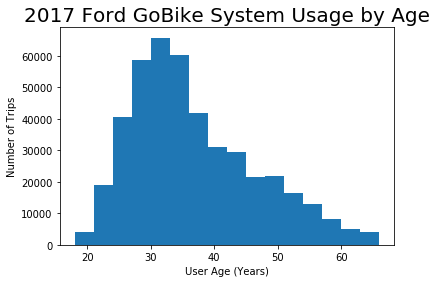

In [59]:
#Histogram of usage in relation to member_age
bin_edges = np.arange(18, df_clean['member_age'].max()+1, 3)
plt.hist(data = df_clean, x = 'member_age', bins = bin_edges);
plt.title("2017 Ford GoBike System Usage by Age", fontsize=20)
plt.xlabel('User Age (Years)')
plt.ylabel('Number of Trips');

###### Univariate Observation 1:
The average age of the Ford GoBike System user in 2017 is 36 years old. Usage trails off fairly steadily after 45 years of age. The youngest user is 18 years old and the oldest 66 years old.  The next variable to be explored is gender.

In [60]:
#Value_counts for gender
df_clean.member_gender.value_counts()

Male      339681
Female     95567
Other       6001
Name: member_gender, dtype: int64

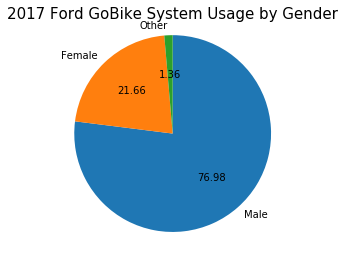

In [61]:
#Pie chart of usage by gender
sorted_counts = df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%.2f');
plt.axis('square');
plt.title("2017 Ford GoBike System Usage by Gender", fontsize=15)
plt.show();

###### Univariate Observation 2:
76.98% of the Ford GoBike System users in 2017 were male, 21.66% were female and 1.36% identified as other. Any analysis based on gender should be made carefully, since the majority of the bike-share users were male. The next analysis will focus on bike-share usage by day of the week.

In [62]:
#Counts of usage by day of the week
df_clean.start_weekday.value_counts()

Tuesday      78585
Wednesday    78516
Thursday     75277
Monday       71889
Friday       70276
Saturday     35261
Sunday       31445
Name: start_weekday, dtype: int64

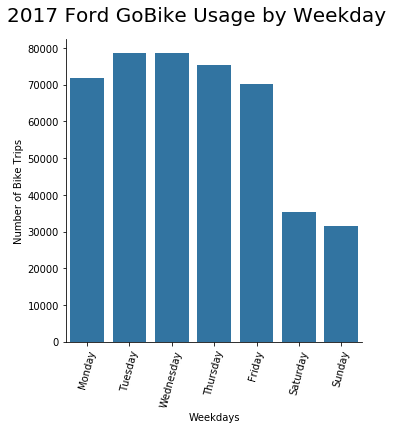

In [63]:
#Categorical bar chart of usage by day of the week.
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Friday', 'Saturday', 'Sunday']
graph = sb.catplot(data=df_clean, x='start_weekday', kind='count', color = base_color, order = weekday)
graph.set_axis_labels('Weekdays', 'Number of Bike Trips')
graph.fig.suptitle('2017 Ford GoBike Usage by Weekday', y=1.05, fontsize=20);
graph.set_xticklabels(rotation=75);

###### Univariate Observation 3:
It appears that the majority of the bike-share usage occurs during the week, with highest use on Tuesday and Wednesday. The usage drops off drastically on Saturday's and Sunday's. This seems to suggest that the bikes are used for workday commuting. However, a bivariate analysis of hour of the day and weekday, will have to be conducted to verify if the bikes are being used during normal United States workday commute hours. The next plot will look at usage by the hour of the day.

In [64]:
#Counts of usage by hour of the day
df_clean.start_hour.value_counts()

8     53639
17    53378
9     41128
18    40836
16    34596
7     25122
19    23127
15    21820
12    20950
13    20357
10    20154
11    18329
14    18223
20    14368
21    10182
6      8288
22     6544
23     3946
0      2060
5      1873
1      1011
2       569
4       504
3       245
Name: start_hour, dtype: int64

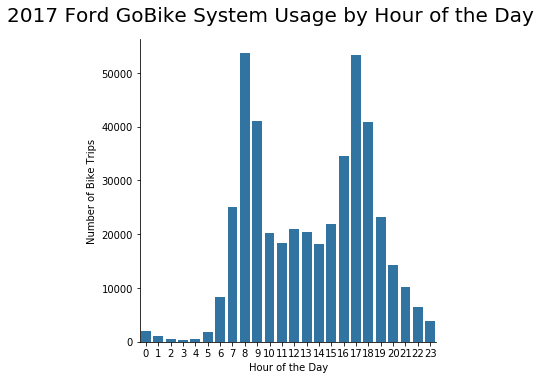

In [65]:
#Categorical bar chart showing usage by hour of the day
graph = sb.catplot(data = df_clean, x='start_hour', kind='count', color = base_color)
graph.set_axis_labels('Hour of the Day', 'Number of Bike Trips')
graph.fig.suptitle('2017 Ford GoBike System Usage by Hour of the Day', y=1.05, fontsize=20);

###### Univariate Observation 4:
The usage of the bike-share system seems to occur mostly during the hours associated with the workday commute in the United States. The highest usage in the morning is at 8AM and in the afternoon at 5pm. This may suggest that the bike-share system is being used by people to commute to and from work. A bivariate exploration by weekday and hour of the day should be performed to confirm this hypothesis. An analysis of usage by month will be explored next.

In [66]:
#Counts of usage by month of the year
df_clean.start_month.value_counts()

October      92919
November     84118
September    83060
December     76317
August       67771
July         34729
June          2335
Name: start_month, dtype: int64

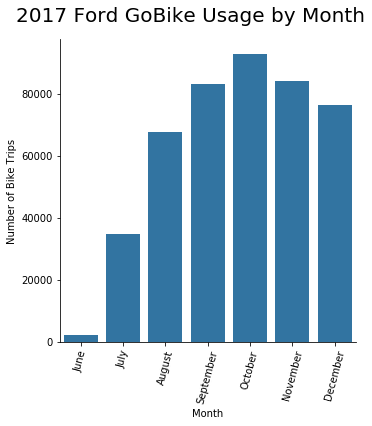

In [67]:
#Categorical bar chart of usage by month
month = ['June', 'July', 'August', 'September',  'October', 'November', 'December']
graph = sb.catplot(data=df_clean, x='start_month', kind='count', color = base_color, order = month)
graph.set_axis_labels('Month', 'Number of Bike Trips')
graph.fig.suptitle('2017 Ford GoBike Usage by Month', y=1.05, fontsize=20);
graph.set_xticklabels(rotation=75);

###### Univariate Observation 5:
The bikeshare data for 2017 only encompasses data from June to December. This analysis shows that the bike-share sytem was used most frequently in the months associated with fall in the United States. The highest usage overall was in October. In the next analysis, usage by type of user will be investigated.

In [68]:
#Counts of usage by subscription status
df_clean.user_type.value_counts()

Subscriber    396005
Customer       45244
Name: user_type, dtype: int64

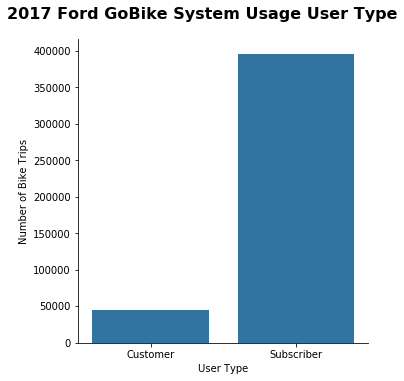

In [69]:
#Categorical bar chart of usage by user type
graph = sb.catplot(data = df_clean, x='user_type', kind='count', color = base_color)
graph.set_axis_labels('User Type', 'Number of Bike Trips')
graph.fig.suptitle('2017 Ford GoBike System Usage User Type', y=1.05, fontsize=16, fontweight='bold');

###### Univariate Observation 6:
The typical user of the bike-share is a subscriber to Ford's GoBike System. This suggests that users of this system are using the service frequently enough that they have paid the subscription fee, rather than pay for each use individually. Usage by trip duration will be considered next.

In [70]:
#Descriptive statistics for duration of trip in minutes
df_clean.duration_min.describe()

count    441249.000000
mean         10.439280
std           7.559895
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max          74.000000
Name: duration_min, dtype: float64

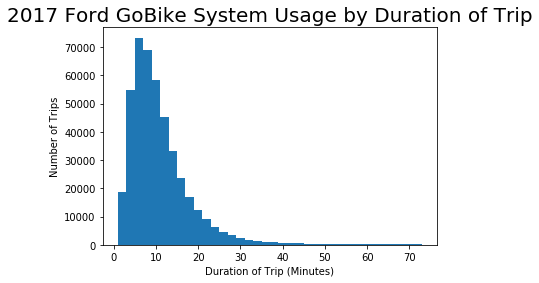

In [71]:
#Histogram of usage in relation to duration of trip in minutes
bin_edges = np.arange(1, df_clean['duration_min'].max()+1, 2)
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges);
plt.title("2017 Ford GoBike System Usage by Duration of Trip", fontsize=20)
plt.xlabel('Duration of Trip (Minutes)')
plt.ylabel('Number of Trips');

In [76]:
#Descriptive statistics for duration_min on a logarithmic scale
np.log10(df_clean['duration_min'].describe())

count    5.644684
mean     1.018671
std      0.878516
min      0.000000
25%      0.778151
50%      0.954243
75%      1.113943
max      1.869232
Name: duration_min, dtype: float64

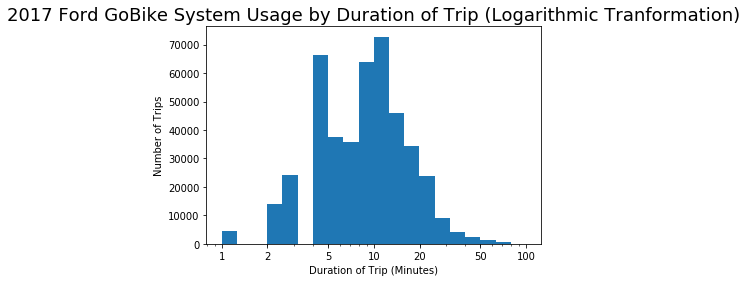

In [143]:
#Histogram of logarithmic transformation of usage by duration_min 
bins=10**np.arange(0, 2 + 0.1, 0.1)
ticks=[1, 2, 5, 10, 20, 50, 100]
labels =['{}'.format(v) for v in ticks]
plt.hist(data=df_clean, x='duration_min', bins=bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.title("2017 Ford GoBike System Usage by Duration of Trip (Logarithmic Tranformation)", fontsize=18)
plt.xlabel('Duration of Trip (Minutes)')
plt.ylabel('Number of Trips');

###### Univariate Observation 7:
Overall, it appears that the bike-share system is used for short durations of time. The first histogram showed usage decreased substantially after ten minutes. As a result of the dramatic drop off, a second histogram was plotted on the logarithmic scale. This analysis showed longest duration of use at 10 minutes or shortly thereafter. The logarithmic transformation makes it easier to see and shows next highest usage at just about 4 minutes. Next, miles traveled by trip will be evaluated.

In [72]:
#Descriptive statistics for miles traveled
df_clean.dist_miles.describe()

count    441249.000000
mean          0.976568
std           0.561434
min           0.000000
25%           0.570000
50%           0.870000
75%           1.280000
max           3.000000
Name: dist_miles, dtype: float64

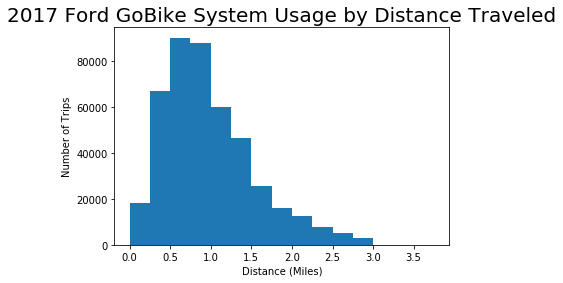

In [73]:
#Histogram of usage in relation to miles traveled
bin_edges = np.arange(0, df_clean['dist_miles'].max()+1, .25)
plt.hist(data = df_clean, x = 'dist_miles', bins = bin_edges);
plt.title("2017 Ford GoBike System Usage by Distance Traveled", fontsize=20)
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Trips');

###### Univariate Observation 8:
Analysis of trip duration in minutes showed that the bike-share system was used for short periods of time, which would suggest shorter distances traveled. This is confirmed in the above plot. Trip distance in relation to usage show that users of the bike share system often travel between a half mile and one mile. 

In [155]:
#Counts of usage by start_station_id
df_clean.start_station_id.value_counts()

30     11684
67     11359
15     11056
58     10821
81      9952
21      9920
22      9430
6       9073
16      8203
3       7726
17      6824
5       6579
90      5961
50      5935
66      5580
48      5372
23      5271
25      5235
182     5133
59      4388
24      4373
44      4294
37      4276
20      4178
19      4056
324     3986
45      3924
27      3913
28      3742
9       3664
       ...  
219       63
231       63
216       61
234       60
288       56
265       54
269       53
283       51
338       51
254       44
206       37
337       34
131       29
224       26
226       23
229       21
237       21
263       20
301       18
258       17
228       13
299       13
267       11
300       10
293        9
294        7
340        3
292        3
339        2
268        1
Name: start_station_id, Length: 272, dtype: int64

In [210]:
df_clean.start_station_name = df_clean.start_station_name.astype('category')
df_clean.start_station_id = df_clean.start_station_id.astype('category')

In [211]:
df_clean.dtypes

start_station_id      category
start_station_name    category
end_station_id          object
end_station_name        object
bike_id                 object
user_type             category
member_gender         category
member_age               int64
duration_min             int64
start_month           category
start_weekday         category
start_hour               int64
end_hour                 int64
dist_miles             float64
dtype: object

In [212]:
df_clean['start_station_name'] = df_clean['start_station_name'].str.replace(r"\(.*\)","")

In [213]:
df_clean['start_station_name'] = df_clean['start_station_name'].str.replace(r"\s*\([^()]*\)","").str.strip()

In [214]:
df_clean.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age,duration_min,start_month,start_weekday,start_hour,end_hour,dist_miles
12,67,San Francisco Caltrain Station 2,24,Spear St at Folsom St,2311,Subscriber,Male,27,36,December,Sunday,23,0,0.94
13,67,San Francisco Caltrain Station 2,24,Spear St at Folsom St,3717,Subscriber,Male,27,36,December,Sunday,23,0,0.94
15,14,Clay St at Battery St,27,Beale St at Harrison St,558,Subscriber,Female,37,25,December,Sunday,23,0,0.65
16,14,Clay St at Battery St,27,Beale St at Harrison St,3646,Subscriber,Male,38,24,December,Sunday,23,0,0.65
18,78,Folsom St at 9th St,15,San Francisco Ferry Building (Harry Bridges Pl...,3114,Subscriber,Other,29,25,December,Sunday,23,0,1.77


In [221]:
top_10_start_stations = df_clean.groupby(['start_station_id']).start_station_name.value_counts().nlargest(10)
top_10_start_stations

start_station_id  start_station_name              
30                San Francisco Caltrain              11684
67                San Francisco Caltrain Station 2    11359
15                San Francisco Ferry Building        11056
58                Market St at 10th St                10821
81                Berry St at 4th St                   9952
21                Montgomery St BART Station           9920
22                Howard St at Beale St                9430
6                 The Embarcadero at Sansome St        9073
16                Steuart St at Market St              8203
3                 Powell St BART Station               7726
Name: start_station_name, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The distributions of the variables of interest identified most of the Ford GoBike users were an average age of 36, male, a subscriber, used the bike-share system during the week and the highest usage occurred before and after workday commuting hours of 9 to 5. The month with the highest usage was October and the bike-share system was most often used for trips short in duration and miles. Due to the cleaning efforts performed, there were no unusual points. One logarithmic transformation was performed on duration of trip in minutes. This showed that highest usage was for trips 10 minutes long. However, second highest usage occurred at 4 minutes. This transformation made the data points much easier to see.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> There weren't any unusual distributions and no further operations were performed on the data to tidy, adjust or change the form of the data.

<a id = 'bivariate'></a>
## Bivariate Exploration

> In this section, relationships amongst variables will be investigated in relation to user type.

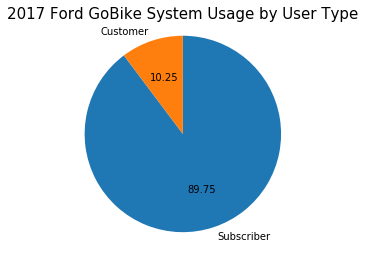

In [239]:
#Pie chart of usage by gender
sorted_counts2 = df_clean['user_type'].value_counts()
plt.pie(sorted_counts2, labels = sorted_counts2.index, startangle = 90,
        counterclock = False, autopct='%.2f');
plt.axis('square');
plt.title("2017 Ford GoBike System Usage by User Type", fontsize=15)
plt.show();

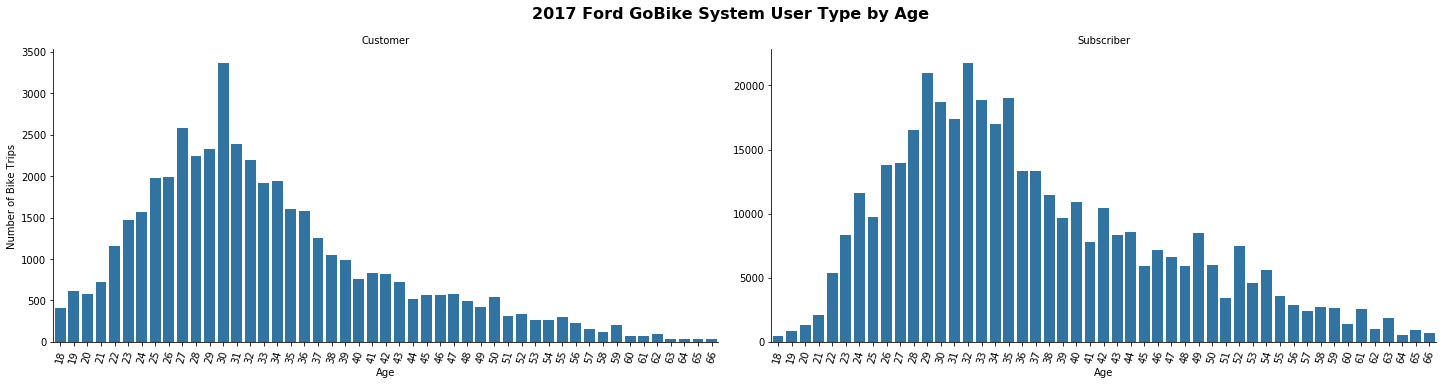

In [247]:
#User type explored by by age
graph = sb.catplot(data = df_clean, x = 'member_age', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2)

graph.set_axis_labels('Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('2017 Ford GoBike System User Type by Age', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

###### Bivariate Observation 1:
Customers that are 30 years old have the highest usage rates of Ford's GoBike system, whereas subscribers that are 32 years old have the highest usage rates. Overall, for both subscribers and customers, usage rates decline around age 37.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id = 'multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

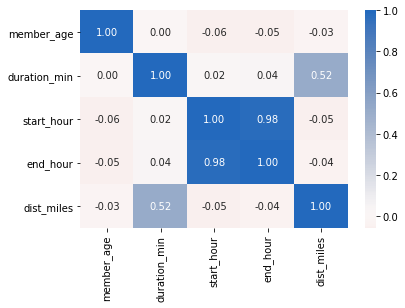

In [244]:
sb.heatmap(df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id = 'references'></a>
### References

- https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266
- https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly
- https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
- https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
- https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
- https://stackoverflow.com/questions/20894525/how-to-remove-parentheses-and-all-data-within-using-pandas-python/20895818